In [1]:
# Install required packages
!pip install plotly bokeh

# Import common libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from bokeh.plotting import figure, show, output_notebook
from bokeh.io import push_notebook
from bokeh.models import ColumnDataSource, LinearColorMapper
from bokeh.layouts import gridplot
output_notebook()


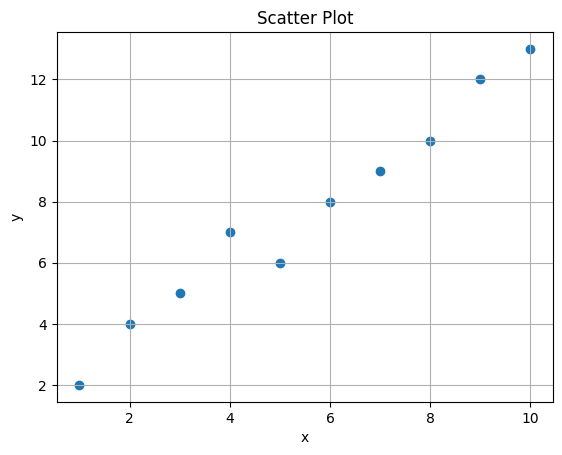

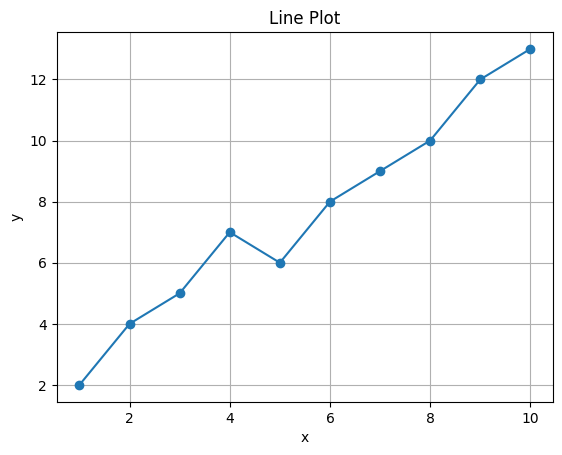

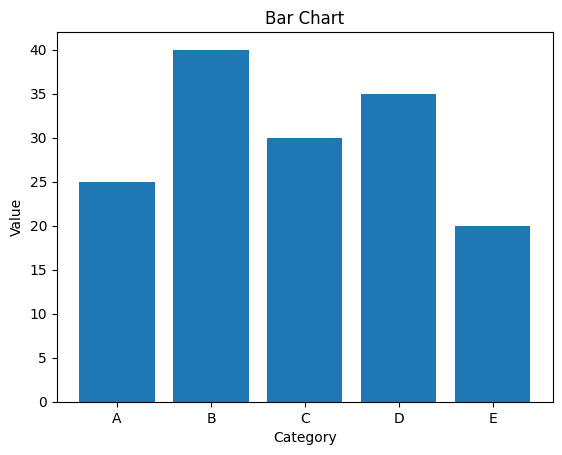

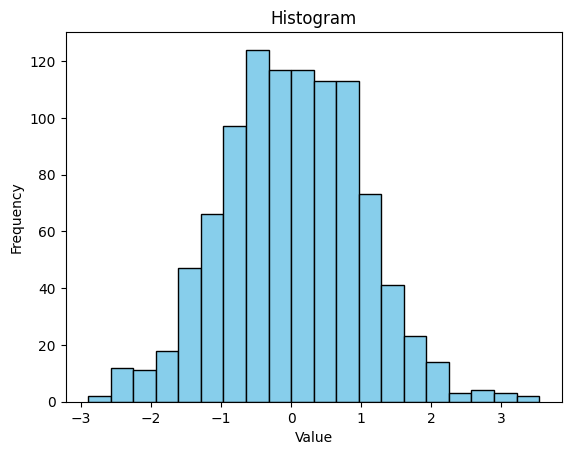

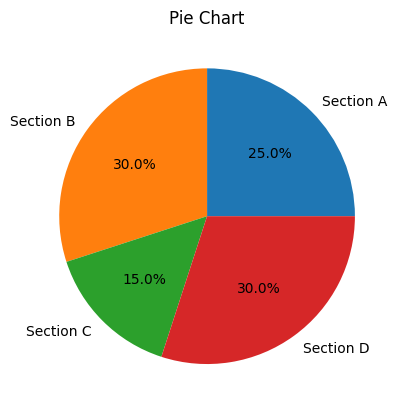

In [2]:
# Data
x = [1,2,3,4,5,6,7,8,9,10]
y = [2,4,5,7,6,8,9,10,12,13]
categories = ['A', 'B', 'C', 'D', 'E']
values = [25, 40, 30, 35, 20]
sections = ['Section A', 'Section B', 'Section C', 'Section D']
sizes = [25, 30, 15, 30]
data = np.random.normal(0, 1, 1000)

# 1. Scatter plot
plt.scatter(x, y)
plt.title("Scatter Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

# 2. Line plot
plt.plot(x, y, marker='o')
plt.title("Line Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

# 3. Bar chart
plt.bar(categories, values)
plt.title("Bar Chart")
plt.xlabel("Category")
plt.ylabel("Value")
plt.show()

# 4. Histogram
plt.hist(data, bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

# 5. Pie chart
plt.pie(sizes, labels=sections, autopct='%1.1f%%')
plt.title("Pie Chart")
plt.show()


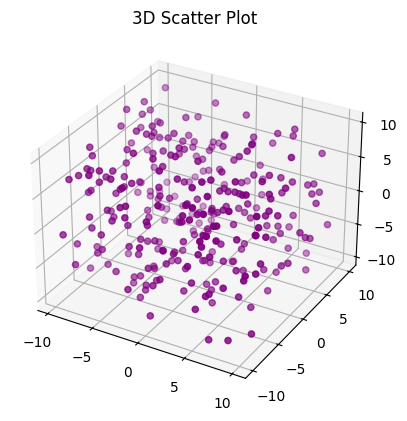

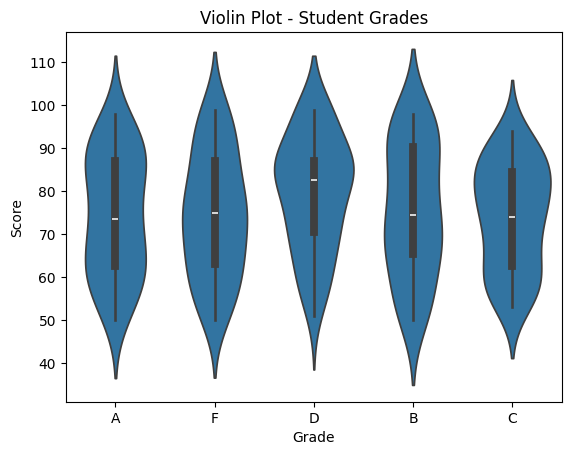

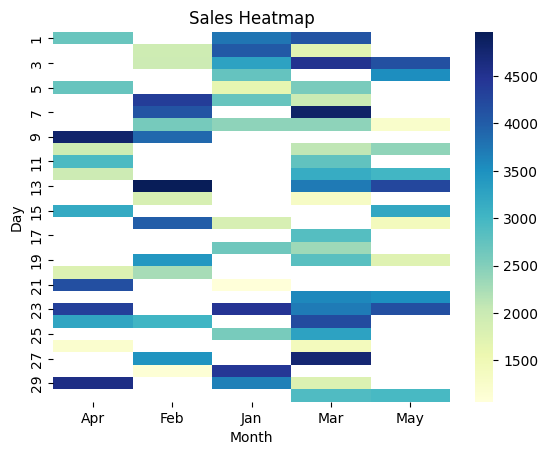

In [3]:
# 1. 3D Scatter Plot - (Visualize with Matplotlib 3D)
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(30)
df = pd.DataFrame({
    'X': np.random.uniform(-10, 10, 300),
    'Y': np.random.uniform(-10, 10, 300),
    'Z': np.random.uniform(-10, 10, 300)
})
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['X'], df['Y'], df['Z'], c='purple', marker='o')
ax.set_title("3D Scatter Plot")
plt.show()

# 2. Violin Plot
np.random.seed(15)
df2 = pd.DataFrame({
    'Grade': np.random.choice(['A', 'B', 'C', 'D', 'F'], 200),
    'Score': np.random.randint(50, 100, 200)
})
sns.violinplot(x='Grade', y='Score', data=df2)
plt.title("Violin Plot - Student Grades")
plt.show()

# 3. Heatmap (Sales data)
np.random.seed(20)
df3 = pd.DataFrame({
    'Month': np.random.choice(['Jan', 'Feb', 'Mar', 'Apr', 'May'], 100),
    'Day': np.random.choice(range(1, 31), 100),
    'Sales': np.random.randint(1000, 5000, 100)
})
pivot = df3.pivot_table(index='Day', columns='Month', values='Sales', aggfunc='mean')
sns.heatmap(pivot, cmap="YlGnBu")
plt.title("Sales Heatmap")
plt.show()


In [4]:
# 1. 3D Surface Plot
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = np.sin(np.sqrt(x**2 + y**2))

fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='3D Surface Plot', autosize=True)
fig.show()

# 2. Bubble Chart
np.random.seed(25)
df4 = pd.DataFrame({
    'Country': ['USA', 'Canada', 'UK', 'Germany', 'France'],
    'Population': np.random.randint(100, 1000, 5),
    'GDP': np.random.randint(500, 2000, 5)
})
fig = go.Figure(data=[go.Scatter(
    x=df4['GDP'], y=df4['Population'],
    mode='markers',
    marker=dict(size=df4['Population'], sizemode='area', color=df4['GDP']),
    text=df4['Country']
)])
fig.update_layout(title="Bubble Chart - GDP vs Population")
fig.show()


In [6]:
from bokeh.models import ColorBar

# 1. Sine Wave Plot
import math
x_vals = np.linspace(0, 10, 100)
y_vals = np.sin(x_vals)
p1 = figure(title="Sine Wave", x_axis_label='x', y_axis_label='sin(x)')
p1.line(x_vals, y_vals, line_width=2, color='navy')
show(p1)

# 2. Scatter Plot with Random Sizes & Colors
np.random.seed(1)
df5 = pd.DataFrame({
    'x': np.random.rand(100),
    'y': np.random.rand(100),
    'sizes': np.random.randint(10, 30, 100),
    'colors': np.random.choice(['red', 'green', 'blue'], 100)
})
p2 = figure(title="Bokeh Scatter Plot")
p2.scatter(df5['x'], df5['y'], size=df5['sizes'], color=df5['colors'], alpha=0.6)
show(p2)

# 3. Bar Chart
fruits = ['Apples', 'Oranges', 'Bananas', 'Pears']
counts = [20, 25, 30, 35]
p3 = figure(x_range=fruits, title="Fruit Counts", toolbar_location=None, tools="")
p3.vbar(x=fruits, top=counts, width=0.5)
show(p3)

# 4. Histogram
data_hist = np.random.randn(1000)
hist, edges = np.histogram(data_hist, bins=30)
p4 = figure(title='Histogram')
p4.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], fill_color="orange", line_color="white")
show(p4)

# 5. Heatmap
data_heatmap = np.random.rand(10, 10)
x = np.linspace(0, 1, 10)
y = np.linspace(0, 1, 10)
xx, yy = np.meshgrid(x, y)

source = ColumnDataSource(data=dict(
    x=xx.flatten(),
    y=yy.flatten(),
    value=data_heatmap.flatten()
))

mapper = LinearColorMapper(palette="Viridis256", low=data_heatmap.min(), high=data_heatmap.max())
p5 = figure(title="Bokeh Heatmap", x_axis_label="X", y_axis_label="Y", tools="", toolbar_location=None)
p5.rect(x='x', y='y', width=0.1, height=0.1, source=source, fill_color={'field': 'value', 'transform': mapper}, line_color=None)
show(p5)
